In [9]:
import os
from dotenv import load_dotenv

load_dotenv()  # This looks for the .env file and loads the variables
# Now os.getenv will actually find the string instead of None
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

# Search API keys
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")

print("Keys set!")

Keys set!


In [10]:
from langchain.chat_models import init_chat_model

# Use Groq LLM
model = init_chat_model(
    model="groq:llama-3.3-70b-versatile",  # Large model for tool calling
    temperature=0.3
)

print("LLM initialized:", model)

LLM initialized: profile={'max_input_tokens': 131072, 'max_output_tokens': 32768, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True} client=<groq.resources.chat.completions.Completions object at 0x00000167D150A290> async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000167D38C36D0> model_name='llama-3.3-70b-versatile' temperature=0.3 model_kwargs={} groq_api_key=SecretStr('**********')


In [11]:
from langchain_tavily import TavilySearch

tavily_search = TavilySearch(
    max_results=5,
    topic="general"
)

print("Tavily search tool ready")


Tavily search tool ready


In [12]:
from langchain_community.utilities import GoogleSerperAPIWrapper

google_search = GoogleSerperAPIWrapper()

print("Google Serper wrapper ready")

Google Serper wrapper ready


In [13]:
result = google_search.run("best places to visit in Kasol travel guide")
print("Google Serper raw:", result)


Google Serper raw: Top Attractions in Kasol ; 1. Sar Pass Trek · 4.9. (14). Hiking Trails ; 2. Parvati Valley. Mountains ; 3. Ayur Spa · 4.8. (5). Spas ; 4. Psychedelic Painting Shop. Missing: guide | Show results with:guide. If you are not based at Chalal, you may reach Kasol from Parvati Woods Cottage or Katagla Forest Retreat in an hour or so, lounge around and have a cup of ... The best way to explore Kasol is on foot. Take day hikes, sit by the Parvati River, and walk your way through the surrounding villages. For ... Visit Manikaran - the food at the Gurudwara is amazing, do go there . There are hot springs here that you can visit. Pulga is a nice offbeat ... For people interested in quiet and peaceful places, quaint little hamlets like Chhalal, Naggar, Malana and Tosh are there. Apart from these picturesque hamlets, ... 12 Best Places to Visit Near Kasol Overview · Chalal Village · Parvati Valley · Manikarna Sahib · Pulga Village · Tosh Village · Malana · Kheerganga · Bhuntar. W

In [16]:
# Basic usage
result = tavily_search.invoke({"query": "Give me latest AI News as of 2026"})
print("Tavily search raw:", result)

Tavily search raw: {'query': 'Give me latest AI News as of 2026', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.cnn.com/2026/02/25/tech/samsung-galaxy-s26-ai-google-gemini', 'title': "AI is making waves everywhere – except where you'd expect it most ...", 'content': 'Artificial intelligence is starting to change the way people work, find information and even form social relationships.', 'score': 0.8573986, 'raw_content': None}, {'url': 'https://www.cnbc.com/2026/02/25/global-ma-boom-surges-2026-ai-mega-deals-capital-squeeze-merger-and-acquisition.html', 'title': 'The global M&A boom is rolling into 2026 as AI sparks deal frenzy', 'content': '"We expect more big deals in 2026, with continued consolidation and geographic expansion," Henry said, with AI-related service providers fueling', 'score': 0.78473216, 'raw_content': None}, {'url': 'https://www.youtube.com/watch?v=inG-6mJOXFg', 'title': 'Figure 03 Reveals 2026 Humanoid Robot Endgame (AI

In [17]:
from langchain_core.tools import Tool 


def tavily_search_tool(query: str) -> str:
    """
    Search the web using Tavily for travel info, tips, attractions, etc.
    """
    # Call the existing TavilySearch tool underneath
    return tavily_search.invoke({"query": query})


def google_serper_search_tool(query: str) -> str:
    """
    Search the web using Google Serper for up-to-date travel info.
    """
    return google_search.run(query)


In [18]:
# testing the funcitonality 

tavily_search_tool("Plan a trip to india")

{'query': 'Plan a trip to india',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://midlifeglobetrotter.com/plan-a-trip-to-india/',
   'title': 'Plan a Trip to India: My Favourite Places & Experiences',
   'content': '# Plan a Trip to India: My Favourite Places & Experiences. I highly recommend an organized tour to visit India, unless you have Indian friends to guide you. Ideally you will have time to explore beyond the Golden Triangle and visit some smaller cities and villages, the latter a lovely respite from the intensity of India’s big cities. My first tour was entirely in Rajasthan, other than the start and end of the tour in Delhi, India’s capital city. Udaipur’s City Palace was my favorite of the palaces I visited in India. If you have time to add Varanasi,\xa0India’s oldest and most holy city is unlike anywhere I have ever been. If you have time, I recommend you spend a few days at one of India’s many nature reserves enjoying the quiet 

In [19]:
# testing the funcitonality 

google_serper_search_tool("Plan a 5 trip to india")

"This five-day tour includes the best of India's Golden Triangle (Delhi, Agra, and Jaipur), including the Taj Mahal, the Red Fort, Jaipur's City Palace, and lots ... and Jaipur)! In this video we share our experiences in India and give tips to plan your dream trip! This video covers where we stayed in ... We are 3-4 friends planning to go for a 5 days holiday during the Diwali weekend. We planned for Goa but it is getting a little over budget now. Can you guys ... India Golden Triangle Tour ... Many first-time visitors do a Golden Triangle tour, which visits the three cities of Delhi, Jaipur and Agra, to see the Taj Mahal. Traveling 5 days in India? Explore India in 5 days with these unique India 5-day itinerary recommendations. Visit Goa, Jaipur, Delhi and Ranthambore! Presuming you reach Delhi the easiest trip could be a day in Delhi - fly to Amritsar for a day - fly to Jaipur or Udaipur - then go to Agra and ... You can go to Hampi, Badami, Pattadakal and Aihole trip if you have inc

Travel planner agent ready!


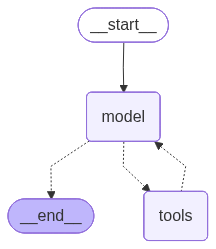

In [20]:
from langchain.agents import create_agent

system_prompt = """
You are a travel planner assistant. User asks travel queries like
'plan my trip to X', 'what to do in Y hotel', etc.
Always use the available web search tools (TavilySearch, GoogleSerperSearch)
to look up latest real-world travel info. Provide a helpful and clear itinerary/answers.
"""

agent = create_agent(
    model=model,
    tools=[tavily_search_tool , google_serper_search_tool],
    system_prompt=system_prompt.strip()
)

print("Travel planner agent ready!")
agent

In [21]:
response = agent.invoke({
    "messages": [
        {"role": "user", "content": "Give me a 3 day plan for Kasol travel with places to see."}
    ]
})

print("Agent answer:\n")
print(response)

Agent answer:

{'messages': [HumanMessage(content='Give me a 3 day plan for Kasol travel with places to see.', additional_kwargs={}, response_metadata={}, id='e615daf2-8c33-49e3-ae80-746266968a09'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fe8x80fs0', 'function': {'arguments': '{"query":"Kasol travel plan 3 days"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': '3sxj59th0', 'function': {'arguments': '{"query":"places to visit in Kasol"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 391, 'total_tokens': 437, 'completion_time': 0.09213364, 'completion_tokens_details': None, 'prompt_time': 0.038184671, 'prompt_tokens_details': None, 'queue_time': 0.048642788, 'total_time': 0.130318311}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': '

In [22]:
response["messages"]

[HumanMessage(content='Give me a 3 day plan for Kasol travel with places to see.', additional_kwargs={}, response_metadata={}, id='e615daf2-8c33-49e3-ae80-746266968a09'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'fe8x80fs0', 'function': {'arguments': '{"query":"Kasol travel plan 3 days"}', 'name': 'tavily_search_tool'}, 'type': 'function'}, {'id': '3sxj59th0', 'function': {'arguments': '{"query":"places to visit in Kasol"}', 'name': 'google_serper_search_tool'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 391, 'total_tokens': 437, 'completion_time': 0.09213364, 'completion_tokens_details': None, 'prompt_time': 0.038184671, 'prompt_tokens_details': None, 'queue_time': 0.048642788, 'total_time': 0.130318311}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_c06d5113ec', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c983

In [23]:
final_answer = response["messages"][-1].content
print(final_answer)


Here's a 3-day plan for your trip to Kasol:

Day 1: Arrival and Exploration of Kasol

* Arrive in Kasol and check into your hotel or campsite
* Visit the Kasol Market and explore the local shops and cafes
* Take a walk along the Parvati River and enjoy the scenic views
* Visit the Gurudwara Shri Manikaran Sahib and the nearby hot springs

Day 2: Trek to Chalal and Tosh

* Start the day with a trek to Chalal, a small village located near Kasol
* Explore the village and its surroundings, and enjoy the scenic views
* Continue the trek to Tosh, another small village located in the Parvati Valley
* Enjoy the sunset and the peaceful atmosphere in Tosh

Day 3: Visit to Manikaran and Return to Kasol

* Start the day with a visit to Manikaran, a small town located near Kasol
* Visit the Manikaran Sahib Gurudwara and the nearby hot springs
* Explore the town and its surroundings, and enjoy the scenic views
* Return to Kasol in the evening and enjoy the local cuisine and culture

This plan provid